In [4]:
#24/01/2020 
#linear regression
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [5]:
X=2*np.random.rand(100,1)
Y=4 + 3*X +np.random.randn(100,1)

#normal equation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta_best

array([[4.17815854],
       [2.75949833]])

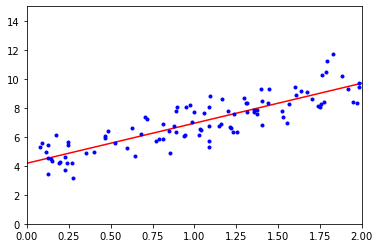

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance >>>
y_predict = X_new_b.dot(theta_best) 
y_predict
        
plt.plot(X_new, y_predict, "r-") 
plt.plot(X, Y, "b.") 
plt.axis([0, 2, 0, 15]) 
plt.show()



In [7]:
X_new_b
y_predict



array([[4.17815854],
       [9.69715521]])

In [8]:
#gradient descent
eta = 0.1  # learning rate 
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)  # random initialization
for iteration in range(n_iterations):   
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)    
    theta = theta - eta * gradients
theta


array([[4.17815854],
       [2.75949833]])

In [1]:
#25/1/2020
#LOGISTIC REGRESSION
from sklearn import datasets
iris = datasets.load_iris() 
list(iris.keys()) 
['data', 'target_names', 'feature_names', 'target', 'DESCR'] 
X = iris["data"][:, 3:]  # petal width 
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0 

NameError: name 'np' is not defined

In [6]:
#28/01/2020

#LOGISTIC REGRESSION
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
iris = datasets.load_iris() 
list(iris.keys()) 
['data', 'target_names', 'feature_names', 'target', 'DESCR'] 
X = iris["data"][:, 3:]  # petal width 
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0 

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() 
log_reg.fit(X, y) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

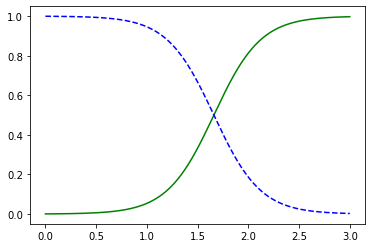

In [8]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) 
y_proba = log_reg.predict_proba(X_new) 
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica") 
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica") 

In [10]:
log_reg.predict([[1.7], [1.5]]) 
array([1, 0])

NameError: name 'array' is not defined

In [1]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky") 
ridge_reg.fit(X, y) 
ridge_reg.predict([[1.5]]) 

NameError: name 'X' is not defined

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\suravi_panigrahi\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-740ba65f0ade>", line 1, in <module>
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
AttributeError: module 'tensorflow' has no attribute 'keras'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\suravi_panigrahi\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\suravi_panigrahi\appdata\local\programs\python\python37\lib\site

AttributeError: module 'tensorflow' has no attribute 'keras'

In [6]:
#28/01/2020
#learning curves
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



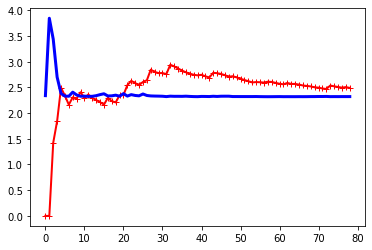

In [8]:
m = 100
X=2*np.random.rand(100,1)
Y=4 + 3*X +np.random.randn(100,1)

def plot_learning_curves(model, X, y):   
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)    
    train_errors, val_errors = [], []    
    for m in range(1, len(X_train)):        
        model.fit(X_train[:m], y_train[:m])       
        y_train_predict = model.predict(X_train[:m])        
        y_val_predict = model.predict(X_val)        
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))        
        val_errors.append(mean_squared_error(y_val_predict, y_val))   
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")    
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg = LinearRegression() 
plot_learning_curves(lin_reg, X, y)

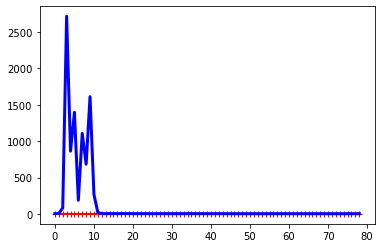

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = Pipeline((        
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),        
        ("sgd_reg", LinearRegression()),   
    ))
plot_learning_curves(polynomial_regression, X, y)